# Stock Market Prediction 📈 - Josue Campos

## Libraries 📚

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime 
import seaborn as sns
sns.set()

import pandas as pd
import os 

# NN libraries
import tensorflow as tf
import keras
from keras import layers
from sklearn.preprocessing import MinMaxScaler 

import warnings 
warnings.filterwarnings("ignore") 

## Data analysis 🔎

In [2]:
file_name = 'META.csv'
stock_name = 'META'

DATA = pd.read_csv('Data/' + file_name, index_col='Date', parse_dates=True)

In [3]:
DATA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.189480,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.993931,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.967144,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.966084,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.994991,50237200


In [145]:
DATA.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-15,516.719971,518.530029,497.279999,500.230011,500.230011,13512900
2024-04-16,498.109985,504.769989,497.109985,499.760010,499.760010,9847900
2024-04-17,503.100006,503.160004,487.140015,494.170013,494.170013,12193700
2024-04-18,499.820007,512.210022,499.040009,501.799988,501.799988,14808700
2024-04-19,502.799988,502.799988,475.730011,481.070007,481.070007,25111000


## Functions 🖇️

In [4]:
def plotDailyClosePrice(stock):
  plt.figure().set_figwidth(18)

  plt.plot(stock['Close'], color='red')
  plt.title('Daily close price')

  plt.show()

def plotCandlesticl(stock, title_label, yaxis_label):
  candlestick = go.Candlestick(
    x = stock.index,
    open = stock['Open'],
    high = stock['High'],
    low = stock['Low'],
    close = stock['Close'])
  
  fig = go.Figure(data = [candlestick])

  fig.update_layout(title=title_label,
                    yaxis_title=yaxis_label,
                    xaxis_rangeslider_visible=False)
  fig.show()

## Plots 🖼️

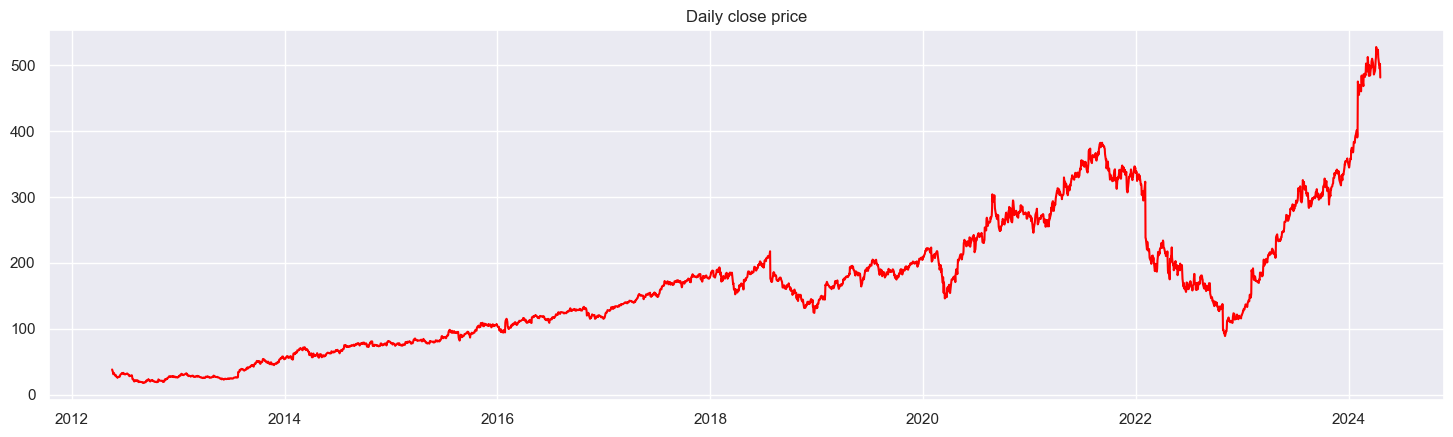

In [5]:
plotDailyClosePrice(DATA)

In [6]:
plotCandlesticl(DATA, stock_name + ' stock', 'Stock price')

## RNN 🧠

In [7]:
interval = 50
training_percentage = 0.8


In [8]:
close_data = DATA.filter(['Close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * training_percentage))

Supongamos que queremos predecir el precio de cierre en el mercado en la fecha $d$, nuestro  de entrenamiento en la red neuronal consta de un elemento $x$ el cual representa un arreglo con $60$ elementos los cuales son los precios de cierre del mercado en las fechas del intervalo $[d - 60, d - 1]$. Por otro lado, nuestro output de entrenamiento esperado es un elemento $y$ que representa el precio de cierre en el mercado en la fecha $d$ según el registro.

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset) 

# Nos tomamos los primeros training datos para entrenar
train_data = scaled_data[0:int(training), :] 

# Creamos los datos de entrenamiento
x_train = [] 
y_train = [] 

for i in range(interval, len(train_data)): 
    x_train.append(train_data[i-interval:i, 0])
    y_train.append(train_data[i, 0]) 

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 

In [11]:
units_value = 96

model = keras.models.Sequential() 
model.add(keras.layers.LSTM(units=units_value, 
                            return_sequences=True, 
                            input_shape=(x_train.shape[1], 1))) 
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.LSTM(units=units_value, return_sequences=True))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.LSTM(units=units_value, return_sequences=True))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.LSTM(units=units_value))
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(1)) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

In [12]:
model.compile(optimizer='adam', 
              loss='mean_squared_error') 
history = model.fit(x_train, 
                    y_train, 
                    epochs=50) 

Epoch 1/50
74/74 [==============================] - 7s 67ms/step - loss: 0.0061
Epoch 2/50
74/74 [==============================] - 5s 73ms/step - loss: 0.0023
Epoch 3/50
74/74 [==============================] - 6s 76ms/step - loss: 0.0019
Epoch 4/50
74/74 [==============================] - 5s 73ms/step - loss: 0.0018
Epoch 5/50
74/74 [==============================] - 6s 78ms/step - loss: 0.0018
Epoch 6/50
74/74 [==============================] - 6s 76ms/step - loss: 0.0017
Epoch 7/50
74/74 [==============================] - 6s 75ms/step - loss: 0.0016
Epoch 8/50
74/74 [==============================] - 5s 73ms/step - loss: 0.0015
Epoch 9/50
74/74 [==============================] - 5s 73ms/step - loss: 0.0015
Epoch 10/50
74/74 [==============================] - 5s 73ms/step - loss: 0.0012
Epoch 11/50
74/74 [==============================] - 5s 74ms/step - loss: 0.0013
Epoch 12/50
74/74 [==============================] - 5s 74ms/step - loss: 0.0011
Epoch 13/50
74/74 [==================

In [13]:
test_data = scaled_data[training - interval:, :]

x_test = []
y_test = dataset[training:, :]

for i in range(interval, len(test_data)):
    x_test.append(test_data[i-interval:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

MSE = np.mean((predictions - y_test)**2)
RMSE = np.sqrt(MSE)

print('Mean Squared Error: ', MSE)
print('Root Mean Squared Error: ', RMSE)

19/19 [==============================] - 1s 21ms/step
Mean Squared Error:  415.5820936748521
Root Mean Squared Error:  20.385830708481127


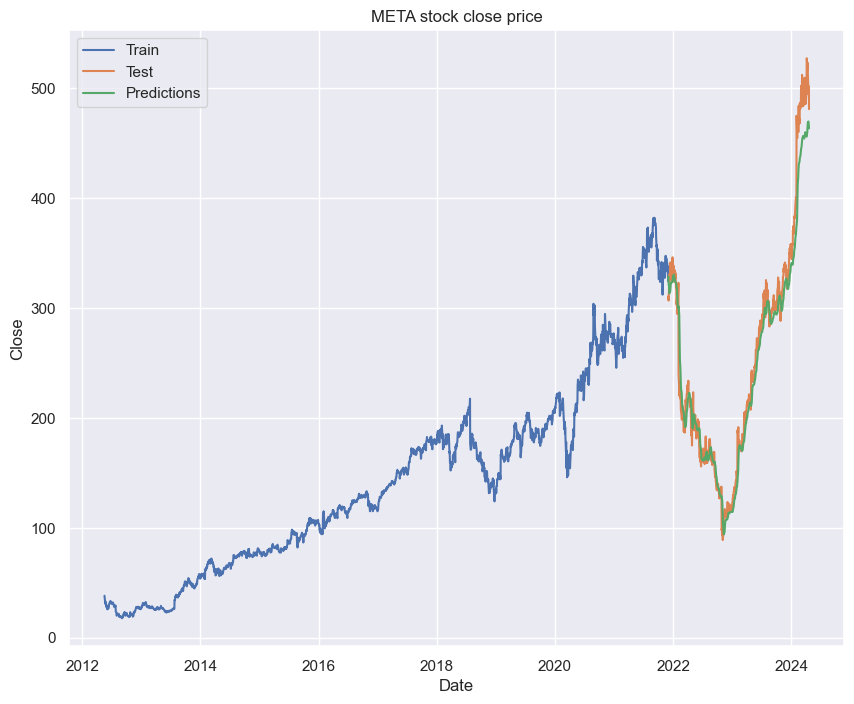

In [14]:
train = DATA[:training]
test  = DATA[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])

plt.title(stock_name + ' stock close price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend(['Train', 'Test', 'Predictions'])

In [16]:
test_data = scaled_data[len(scaled_data) - interval:, :]

predictions = np.array([])
y_test = dataset[training:, :]

n = len(test_data)
for i in range(interval, n + 50):
    x_test = test_data[i - interval:i, 0]
    x_test = np.reshape(x_test, (1, x_test.shape[0], 1))

    prediction = model.predict(x_test)
    predictions = np.append(predictions, prediction)

    test_data = np.append(test_data, prediction)
    test_data = np.reshape(test_data, (test_data.shape[0], 1))

predictions = np.reshape(predictions, (predictions.shape[0], 1))
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 0s 15ms/step


(50,)
Predictions:  [[461.11605877]
 [457.38237883]
 [452.59893458]
 [447.31955567]
 [442.0022686 ]
 [436.89952104]
 [432.10006909]
 [427.60142201]
 [423.36597538]
 [419.35011053]
 [415.51765068]
 [411.84150122]
 [408.30237395]
 [404.88626593]
 [401.58297113]
 [398.38465275]
 [395.28474978]
 [392.27764282]
 [389.35865409]
 [386.52343996]
 [383.76793015]
 [381.08857079]
 [378.48192946]
 [375.94475605]
 [373.47407379]
 [371.06699704]
 [368.72070091]
 [366.43272503]
 [364.20057862]
 [362.02201393]
 [359.8946617 ]
 [357.81654755]
 [355.78572746]
 [353.80013594]
 [351.85813272]
 [349.95798643]
 [348.09811755]
 [346.27700732]
 [344.49307625]
 [342.74517008]
 [341.03180043]
 [339.35178266]
 [337.70393215]
 [336.08706426]
 [334.50023738]
 [332.94226686]
 [331.41221108]
 [329.90924991]
 [328.43228985]
 [326.98069302]]


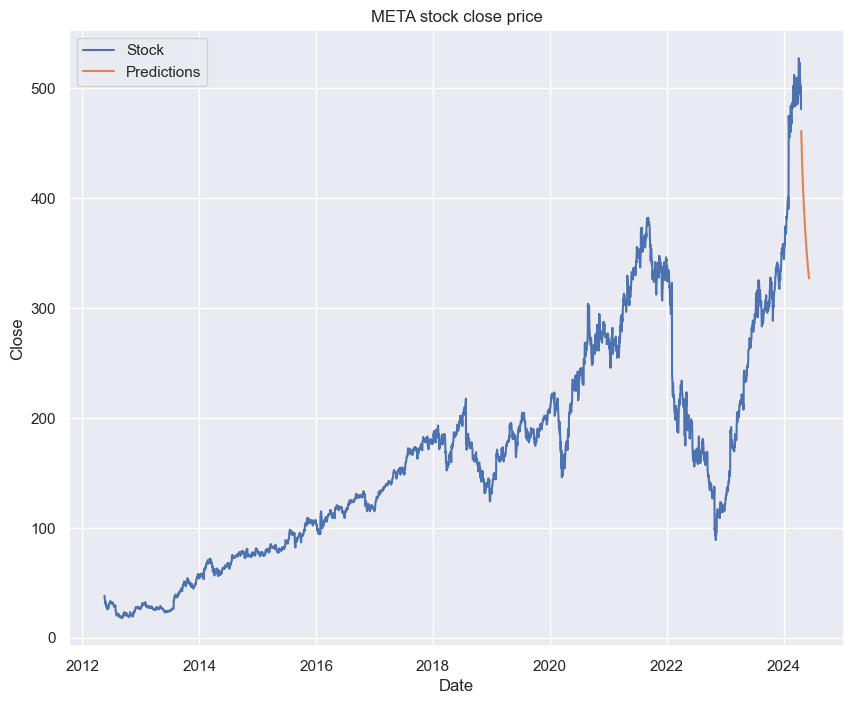

In [17]:
start_dt = datetime(2024, 4, 20)
end_dt = start_dt + pd.Timedelta(days=len(predictions)-1)

date_range = pd.date_range(start=start_dt, end=end_dt, freq='D')

print(date_range.shape)

plt.figure(figsize=(10, 8))
plt.plot(DATA['Close'])
plt.plot(date_range, predictions)

plt.title(stock_name + ' stock close price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend(['Stock', 'Predictions'])

print('Predictions: ', predictions)

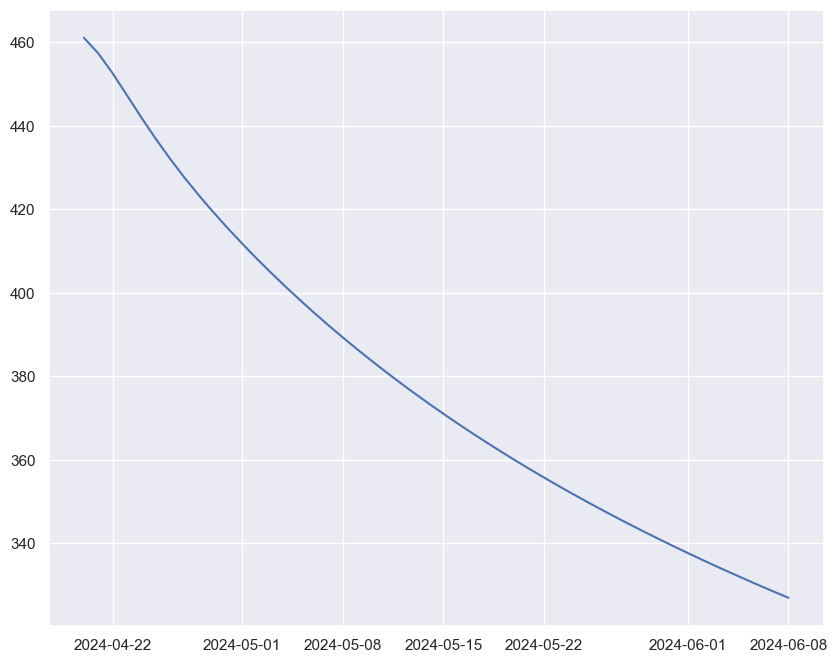

In [18]:
plt.figure(figsize=(10, 8))
plt.plot(date_range, predictions)